### About Dataset
#### The Data is collected from Kaggle(public dataset)No-show-investigate-dataset https://www.kaggle.com/datasets/raniahelmy/no-show-investigate-dataset
#### The data associated with Show and NoShow Appointment of patients will be analyzed. 

### Project Context: 
#### Show or NoShow of a patient to the doctor's appointment.

### Contents: 
#### * Scheduled date, Gender, Age, Scholarship 
#### * Hypertension , Diabetes, Alcoholism,Handicap 
#### * SMS_received (indicated whether 1 or more messages sent to the patient) regarding appointment.

### Problem Statement:
#### * Analyse the data of the patients.
#### * Visualize data of patients.
#### * Find the Probability of the patients with Show or NoShow to the appointment with different conitions (Alcoholism,  Hypertension, Diabetes, Handicap Status, Age And Days Scheduled).


### Import Libraries and getting information on the data


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import data

data=pd.read_csv('medical_appointment.csv')

### Describing and Geting Information on Data

In [3]:
#Data description
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Check for null values
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
#Get Data head
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Change and Modify the  incorrect data

In [7]:
# Changing Header spellings
data=data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived','No-show':'Noshow'})
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# Modifying the date and time into standard form 
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay']).dt.date.astype('datetime64[ns]')
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay']).dt.date.astype('datetime64[ns]')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Noshow
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# Storing weekdays into a variable for schedule day and appointment day 

data['sch_weekday'] = data['ScheduledDay'].dt.dayofweek
data['app_weekday'] = data['AppointmentDay'].dt.dayofweek
data['sch_weekday'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: sch_weekday, dtype: int64

In [10]:
data['app_weekday'].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: app_weekday, dtype: int64

In [11]:
# Dropping the negative values 
data.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Noshow,sch_weekday,app_weekday
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,0,0


In [12]:
data.drop([99832],inplace=True)

In [13]:
data.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Noshow,sch_weekday,app_weekday


### Distribution and Probability of Show and NoShow Patients to their appointments

In [14]:
# Show And No-Show patient distribution
# Yes= No-show # No = Show
data['Noshow'].value_counts()

No     88207
Yes    22319
Name: Noshow, dtype: int64

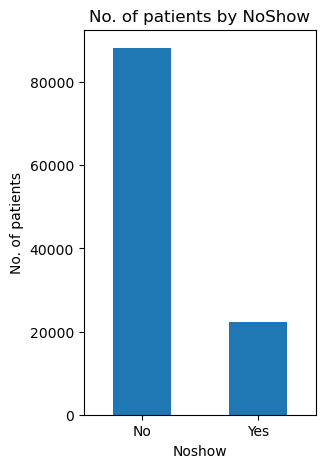

In [15]:
#plotting distribution of show and Noshow 
ax = data['Noshow'].value_counts().plot(
        kind='bar',
        title = 'No. of patients by NoShow',
        figsize=(3, 5),
        rot=0)
ax.set_xlabel('Noshow')
ax.set_ylabel('No. of patients');



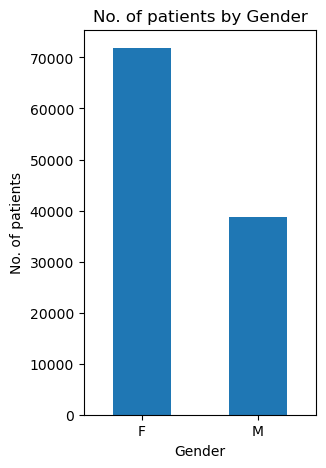

In [16]:
#plotting distribution of Gender on a histogram
ax = data['Gender'].value_counts().plot(
        kind='bar',
        title = 'No. of patients by Gender',
        figsize=(3, 5),
        rot=0)
ax.set_xlabel('Gender')
ax.set_ylabel('No. of patients');

In [17]:
# Assigning Variables to Genders 

patients = data['Gender'].count()
patients
f_count = data.query('Gender == "F"').count().Gender
f_count
m_count = data.query('Gender == "M"').count().Gender
m_count
print("Total number of patients:",patients)
print("Number of Female patients:",f_count)
print("Number of Male patients:",m_count)

Total number of patients: 110526
Number of Female patients: 71839
Number of Male patients: 38687


In [18]:
# Changing Value to % for both male and female patient counts
f_percent = (f_count/patients) * 100
f_percent
m_percent = (m_count/patients) * 100
m_percent
print("Percent of Female patients:",f_percent)
print("Percent of Male patients:",m_percent)

Percent of Female patients: 64.99737618297956
Percent of Male patients: 35.00262381702043


In [19]:
# pivot table with gender and Noshow column 
data_ns = data.groupby(['Noshow','Gender'],as_index=False).size()
ns_pivot = pd.pivot_table(data_ns, values = 'size',columns=['Noshow'],index='Gender')
ns_pivot

Noshow,No,Yes
Gender,,
F,57245,14594
M,30962,7725


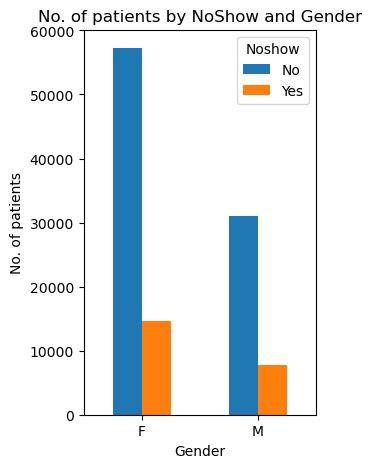

In [20]:
# Visualizing the pivot table 
ax = ns_pivot.plot(
        kind='bar',
        title = 'No. of patients by NoShow and Gender',
        figsize=(3, 5),
        rot=0)
ax.set_xlabel('Gender')
ax.set_ylabel('No. of patients');

In [21]:
# From Above Pivot Table Separating the Gender Show and Noshow
f_show_count = data.query('Gender == "F" & Noshow == "No"').count().Gender
print('Number of females who showed: ' + str(f_show_count))

# number of females who did not show
f_noshow_count = data.query('Gender == "F" & Noshow == "Yes"').count().Gender
print('Number of females who did not show: ' + str(f_noshow_count))

# number of males who showed
m_show_count = data.query('Gender == "M" & Noshow == "No"').count().Gender
print('Number of males who showed: ' + str(m_show_count))

#number of males who did not show
m_noshow_count = data.query('Gender == "M" & Noshow == "Yes"').count().Gender
print('Number of males who did not show: ' + str(m_noshow_count))

Number of females who showed: 57245
Number of females who did not show: 14594
Number of males who showed: 30962
Number of males who did not show: 7725


In [22]:
#creating a function for calculating percentages
def percentage(value,total):
    var_percent = (sample/total)*100
    return var_percent

In [23]:
# creating a probability function
def probability(outcome,total):
    prob = (outcome/total)
    return prob

In [24]:
# probability of a female showing
f_show_prob = probability(f_show_count,f_count)

# rounding to two decimal places 
round(f_show_prob,2)
print("Probability of female showing to appointment:", round(f_show_prob,2))

# probability of a male showing
m_show_prob = probability(m_show_count,m_count)
round(m_show_prob,2)
print("Probality of male showing to appointment:",round(m_show_prob,2))


Probability of female showing to appointment: 0.8
Probality of male showing to appointment: 0.8


#### Probality of female showing to appointment: 80 %
#### Probality of male showing to appointment: 80 %

### Distribution and Probability of Scholarship Patients

In [25]:
#checking distribution of scholarship receipients
data['Scholarship'].value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

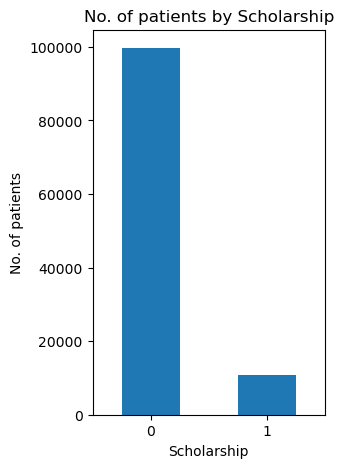

In [26]:
#plotting the distribution of patients based on scholarship status
ax = data['Scholarship'].value_counts().plot(
        kind='bar',
        title = 'No. of patients by Scholarship',
        figsize=(3, 5),
        rot=0)
ax.set_xlabel('Scholarship')
ax.set_ylabel('No. of patients');

In [27]:
# check if the Scholarship have an impact on the appointments
#creating a pivot table for Scholarship and NoShow
data_sc = data.groupby(['Noshow','Scholarship'],as_index=False).size()
sc_pivot = pd.pivot_table(data_sc, values = 'size',columns=['Noshow'],index='Scholarship')
sc_pivot

Noshow,No,Yes
Scholarship,,
0,79924,19741
1,8283,2578


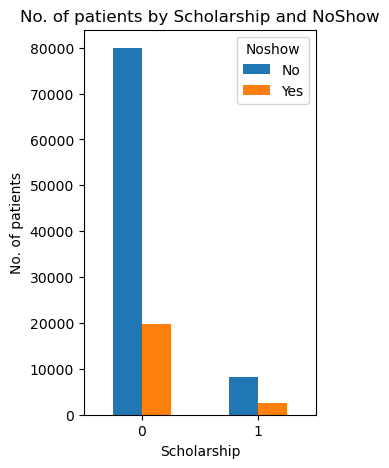

In [28]:
#plotting the pivot table on a grouped bar chart
ax = sc_pivot.plot(
        kind='bar',
        title = 'No. of patients by Scholarship and NoShow',
        figsize= (3,5),
        rot=0)
ax.set_xlabel('Scholarship')
ax.set_ylabel('No. of patients');

In [29]:
# Drawing Probabilities for Conclusion

# variable for scholarship recipients
scholarship_count = data.query('Scholarship == 1').count().Scholarship
print('Number of patients on scholarship: ' + str(scholarship_count))

# variable for non scholarship patients
noscholarship_count = data.query('Scholarship == 0').count().Scholarship
print('Number of patients without scholarship: ' + str(noscholarship_count))


Number of patients on scholarship: 10861
Number of patients without scholarship: 99665


In [30]:
# number of scholarship recipients who showed up
scholarship_show = data.query('Scholarship == 1 & Noshow == "No"').count().Scholarship

# probability of a scholarship recipient showing up
scholarship_show_prob = probability(scholarship_show,scholarship_count)
round(scholarship_show_prob,2)
print("Probability of scholarship recipient Showing up:",round(scholarship_show_prob,2))

# number of no scholarship patients who showed up
noscholarship_show = data.query('Scholarship == 0 & Noshow == "No"').count().Scholarship

# probability of a non scholarship patient showing up 
noscholarship_show_prob = probability(noscholarship_show,noscholarship_count)
round(noscholarship_show_prob,2)
print("Probability of No scholarship recipient Showing up:",round(noscholarship_show_prob,2))


Probability of scholarship recipient Showing up: 0.76
Probability of No scholarship recipient Showing up: 0.8


#### Probability of scholarship recipient Showing up: 76 %
#### Probability of No scholarship recipient Showing up: 80 %

### Distribution and Probability for patients who recieved SMS regarding their appointmnets.

In [31]:
# Showing and no showing of SMS Recieved patients

# number of patients who did not receive sms
no_sms = data.query('SMSReceived == 0').count().SMSReceived
print('Number of patients who did not receive SMS: ' + str(no_sms))

# no of patients who recieved an sms
sms_true = data.query('SMSReceived == 1').count().SMSReceived
print('Number of patients who received SMS: ' + str(sms_true))

Number of patients who did not receive SMS: 75044
Number of patients who received SMS: 35482


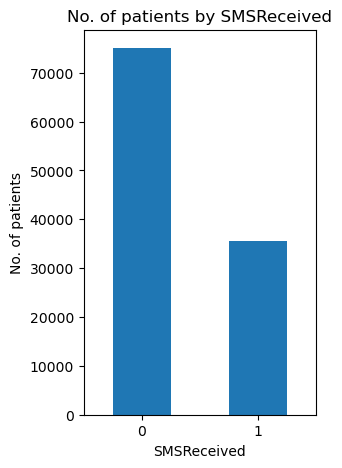

In [32]:
#plotting distribution of the value counts
ax = data['SMSReceived'].value_counts().plot(
        kind='bar',
        title = 'No. of patients by SMSReceived',
        figsize=(3,5),
        rot=0)
ax.set_xlabel('SMSReceived')
ax.set_ylabel('No. of patients');

In [33]:
#creating a pivot table for the SMSReceived and NoShow columns
data_sms = data.groupby(['SMSReceived','Noshow'],as_index=False).size()
sms_pivot = pd.pivot_table(data_sms, values = 'size',columns=['Noshow'],index='SMSReceived')
sms_pivot

Noshow,No,Yes
SMSReceived,,
0,62509,12535
1,25698,9784


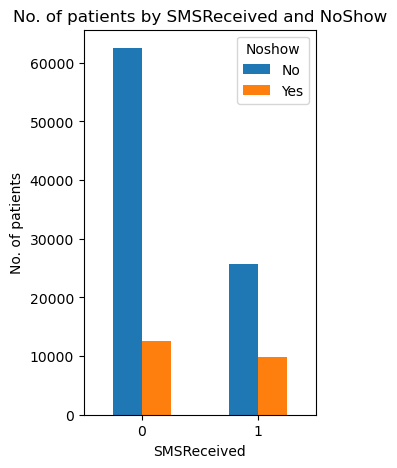

In [34]:
#visualizing the pivot table on a grouped bar chart
ax = sms_pivot.plot(
        kind='bar',
        title = 'No. of patients by SMSReceived and NoShow',
        figsize=(3,5),
        rot=0)
ax.set_xlabel('SMSReceived')
ax.set_ylabel('No. of patients');

In [35]:
#number of patients who did not receive SMS and showed up
nosms_show = data.query('SMSReceived == 0 & Noshow == "No"').count().SMSReceived
print('Number of patients who did not receive SMS and showed: ' + str(nosms_show))

#number of patients who received SMS and showed up
sms_show = data.query('SMSReceived == 1 & Noshow == "No"').count().SMSReceived
print('Number of patients who received SMS and showed: ' + str(sms_show))

Number of patients who did not receive SMS and showed: 62509
Number of patients who received SMS and showed: 25698


In [36]:
# probability of a patient who did not receive sms showing up
# assignng above values to show

nosms_show_prob = probability(nosms_show,no_sms)
round(nosms_show_prob,2)
print ('probability of a patient who did not recieve sms showing up:',round(nosms_show_prob,2))

# probability of a patient who received SMS showing 
sms_show_prob = probability(sms_show,sms_true)
round(sms_show_prob,2)
print ('probability of a patient who recieved sms showing up:',round(sms_show_prob,2))


probability of a patient who did not recieve sms showing up: 0.83
probability of a patient who recieved sms showing up: 0.72


#### Probability of a patient who did not recieve sms showing up: 83 %
#### Probability of a patient who recieved sms showing up: 72 %

### Distribution and Probability for patients with Alcoholism

In [37]:
# checking probability for alcoholism
#checking distribution of alcoholism status 
data['Alcoholism'].value_counts()

0    107166
1      3360
Name: Alcoholism, dtype: int64

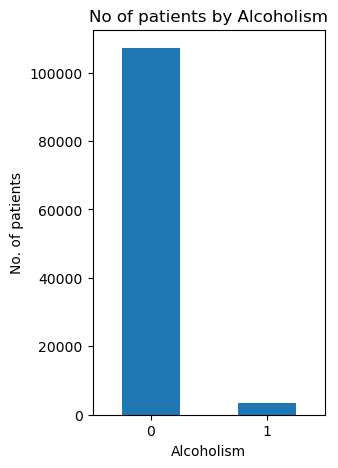

In [38]:
# plotting the results above 
ax = data['Alcoholism'].value_counts().plot(
        kind='bar',
        title = 'No of patients by Alcoholism',
        figsize=(3,5),
        rot=0)
ax.set_xlabel('Alcoholism')
ax.set_ylabel('No. of patients');

In [39]:
#creating a pivot table for the Alcoholism and NoShow columns
data_alcohol = data.groupby(['Noshow','Alcoholism'],as_index=False).size()
alcoholism_pivot = pd.pivot_table(data_alcohol, 
        values = 'size',
        columns=['Noshow'],
        index='Alcoholism')
alcoholism_pivot

Noshow,No,Yes
Alcoholism,,
0,85524,21642
1,2683,677


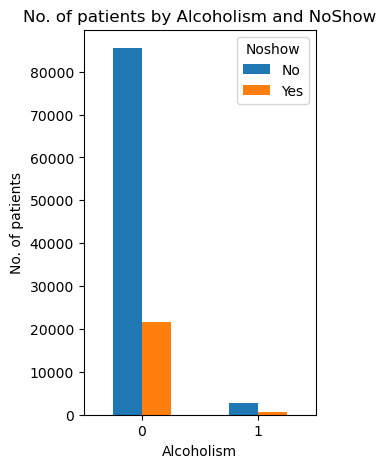

In [40]:
#plotting the pivot table above on a grouped bar chart
ax = alcoholism_pivot.plot(
        kind='bar',
        title='No. of patients by Alcoholism and NoShow',
        figsize=(3,5),
        rot=0)
ax.set_xlabel('Alcoholism')
ax.set_ylabel('No. of patients');

In [41]:
#calculating number of patients involved in alcoholism and showed up
alcoholism_show = data.query('Alcoholism == 1 & Noshow == "No"').count().Alcoholism

# number of patients involved in alcohol
alcoholism_count = data.query('Alcoholism == 1').count().Alcoholism

# calculating probability
alcoholism_show_prob = probability(alcoholism_show,alcoholism_count)
round(alcoholism_show_prob,2)
print('Probability of Alcoholism patients showing up:',round(alcoholism_show_prob,2))

Probability of Alcoholism patients showing up: 0.8


#### Probability of Show for Alcohol Patients: 80 %


### Distribution And Probablity for patients with Hypertension

In [42]:
# Probability for Hypertension
# distribution of hypertension
data['Hypertension'].value_counts()

0    88725
1    21801
Name: Hypertension, dtype: int64

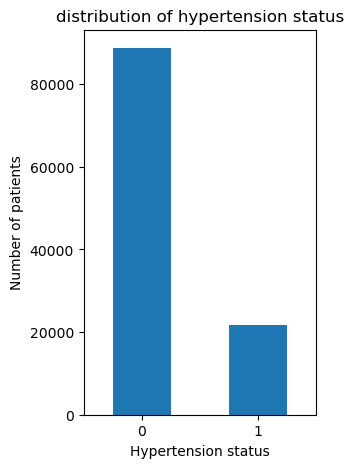

In [43]:
#plotting value counts
ax = data['Hypertension'].value_counts().plot(
        kind='bar',
        title= 'distribution of hypertension status',
        figsize=(3,5),
        rot=0)
ax.set_xlabel('Hypertension status')
ax.set_ylabel('Number of patients');

In [44]:
# pivot table of NoShow and Hypertension columns
data_hyper = data.groupby(['Noshow','Hypertension'],as_index=False).size()
hyper_pivot = pd.pivot_table(data_hyper, 
        values = 'size',
        columns=['Noshow'],
        index='Hypertension')
hyper_pivot

Noshow,No,Yes
Hypertension,,
0,70178,18547
1,18029,3772


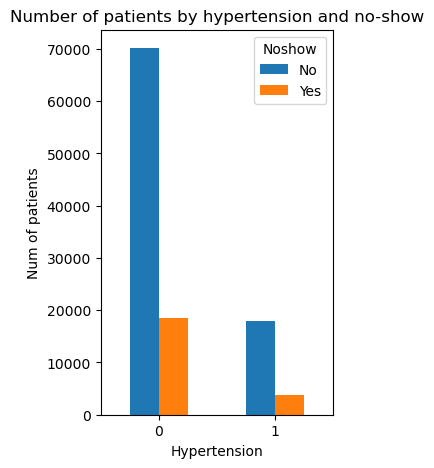

In [45]:
# plotting the pivot table on a grouped bar chart
ax = hyper_pivot.plot(
        kind='bar',
        title='Number of patients by hypertension and no-show',
        figsize=(3,5),
        rot=0)
ax.set_xlabel('Hypertension')
ax.set_ylabel('Num of patients');

In [46]:
# number of patients with hypertension that showed up
hyper_show = data.query('Hypertension == 1 & Noshow == "No"').count().Hypertension

# number of patients with hypertension
hyper_count = data.query('Hypertension == 1').count().Hypertension

# calculating probability
hyper_show_prob = probability(hyper_show,hyper_count)
round(hyper_show_prob,2)
print("probability of Hypertension patients Showing up:", round(hyper_show_prob,2))

probability of Hypertension patients Showing up: 0.83


#### PRobability of Hypertension patients Showing up: 83 %

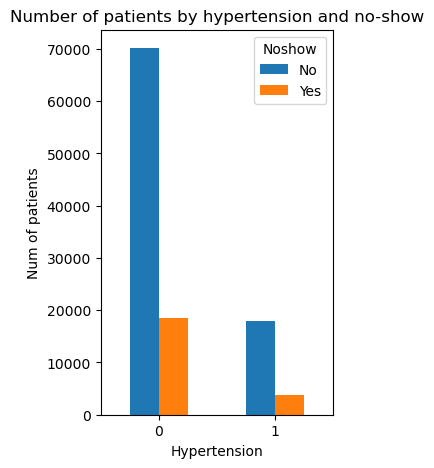

In [47]:
# plotting the pivot table on a grouped bar chart
ax = hyper_pivot.plot(
        kind='bar',
        title='Number of patients by hypertension and no-show',
        figsize=(3,5),
        rot=0)
ax.set_xlabel('Hypertension')
ax.set_ylabel('Num of patients');

### Distribution and Probability for Diabetes 

In [48]:
# Probability for Diabetes
# distribution of diabetes status
data['Diabetes'].value_counts()

0    102583
1      7943
Name: Diabetes, dtype: int64

In [49]:
# pivot table of diabetes and no-show column
data_diabetes = data.groupby(['Noshow','Diabetes'],as_index=False).size()
diabetes_pivot = pd.pivot_table(data_diabetes, 
        values = 'size',
        columns=['Noshow'],
        index='Diabetes')
diabetes_pivot

Noshow,No,Yes
Diabetes,,
0,81694,20889
1,6513,1430


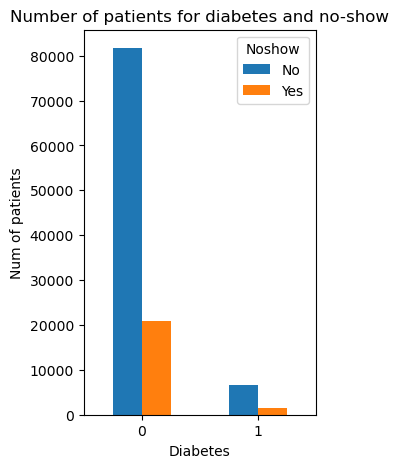

In [50]:
# plotting the pivot table on a grouped bar chart
ax = diabetes_pivot.plot(
        kind='bar',
        title='Number of patients for diabetes and no-show',
        figsize=(3,5),
        rot=0)
ax.set_xlabel('Diabetes')
ax.set_ylabel('Num of patients');

In [51]:
# number of patients without diabetes
no_diabetes_count = data.query('Diabetes == 0').count().Diabetes

# number of non-diabetic patients who showed up
no_diabetes_show_count = data.query('Diabetes == 0 & Noshow== "No"').count().Diabetes

#calculating probability
no_diabetes_show_prob = probability(no_diabetes_show_count,no_diabetes_count)
round(no_diabetes_show_prob,2)
print("Probability of No Diabetes Showing up:",round(no_diabetes_show_prob,2))

Probability of No Diabetes Showing up: 0.8


#### Probability of No Diabetes Showing up: 80 %

In [52]:
#number of diabetic patients
diabetes_count = data.query('Diabetes == 1').count().Diabetes

#number of diabetic patients who showed up
diabetes_show_count = data.query('Diabetes == 1 & Noshow == "No"').count().Diabetes

#calculating probability
diabetes_show_prob = probability(diabetes_show_count,diabetes_count)
round(diabetes_show_prob,2)
print("Probability of No Diabetes Showing up:",round(diabetes_show_prob,2))

Probability of No Diabetes Showing up: 0.82


#### Probability of No Diabetes Showing up: 82 %

### Distribution and Probability for patients of Handicap Status

In [53]:
# probability for patients of Handicap status 
#distribution of handicap status
data['Handicap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [54]:
#creating a pivot table of the handicap status column and no-show
data_hc = data.groupby(['Handicap','Noshow'],as_index=False).size()
hc_pivot = pd.pivot(data_hc,values='size',index='Handicap',columns='Noshow')
hc_pivot

Noshow,No,Yes
Handicap,,
0,86373,21912
1,1676,366
2,146,37
3,10,3
4,2,1


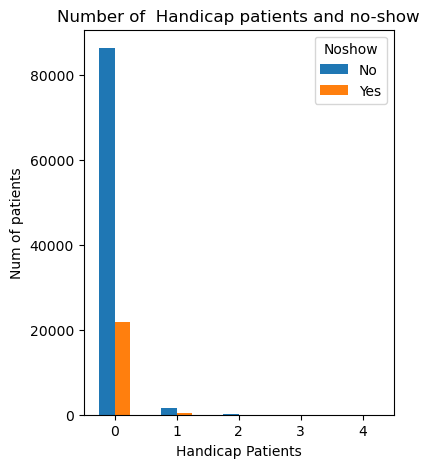

In [55]:
# Chart for grouped pivot Table
ax = hc_pivot.plot(
        kind='bar',
        title='Number of  Handicap patients and no-show',
        figsize=(4,5),
        rot=0)
ax.set_xlabel('Handicap Patients')
ax.set_ylabel('Num of patients');

In [56]:
# number of patients with zero handicap status
zero_hc_count = data.query('Handicap == 0').count().Handicap

#number of patients with zero handicap status who showed up
zero_hc_show = data.query('Handicap == 0 & Noshow == "No"').count().Handicap

#calculating probability
zero_hc_show_prob = probability(zero_hc_show,zero_hc_count)
round(zero_hc_show_prob,2)
print('Probability for patients with zero Handicap Status:',round(zero_hc_show_prob,2))

Probability for patients with zero Handicap Status: 0.8


#### Probability for patients with zero Handicap Status: 80 %

In [57]:
#number of patients with one handicap status
one_hc_count = data.query('Handicap == 1').count().Handicap

#number of one handicap status patients who showed up
one_hc_show = data.query('Handicap == 1 & Noshow == "No"').count().Handicap

# calculating probability
one_hc_show_prob = probability(one_hc_show,one_hc_count)
round(one_hc_show_prob,2)
print('Probability for patients with 1 Handicap Status:',round(one_hc_show_prob,2))

Probability for patients with 1 Handicap Status: 0.82


#### Probability for patients with 1 Handicap Status: 82 %

In [58]:
# number of patients with two handicap status
two_hc_count = data.query('Handicap == 2').count().Handicap

# number of patients with 2 handicap status who showed
two_hc_show = data.query('Handicap == 2 & Noshow == "No"').count().Handicap

# calculating probability
two_hc_show_prob = probability(two_hc_show,two_hc_count)
round(two_hc_show_prob,2)
print('Probability for patients with 2 Handicap Status:',round(two_hc_show_prob,2))

Probability for patients with 2 Handicap Status: 0.8


#### Probability for patients with 2 Handicap Status: 80 %

In [59]:
# number of patients with 3 handicap status
three_hc_count = data.query('Handicap == 3').count().Handicap

# number of patients with 3 handicap status who showed
three_hc_show = data.query('Handicap == 3 & Noshow == "No"').count().Handicap

# calculating probability
three_hc_show_prob = probability(three_hc_show,three_hc_count)
round(three_hc_show_prob,2)
print('Probability for patients with 3 Handicap Status:',round(zero_hc_show_prob,2))

Probability for patients with 3 Handicap Status: 0.8


#### Probability for patients with 3 Handicap Status: 80 %

In [60]:
#number of patients with four handicap status
four_hc_count = data.query('Handicap == 4').count().Handicap

#number of patients with four handicap status who showed
four_hc_show = data.query('Handicap == 4 & Noshow == "No"').count().Handicap

# calculating probability
four_hc_show_prob = probability(four_hc_show,four_hc_count)
round(four_hc_show_prob,2)
print('Probability for patients with 4 Handicap Status:',round(four_hc_show_prob,2))

Probability for patients with 4 Handicap Status: 0.67


#### Probability for patients with 4 Handicap status: 67 %

### Distribution and Probability for Days

In [61]:
#Probability for days
#creating a new column to contain the day of the week of appointment
data['Day'] = data['AppointmentDay'].dt.day_name()

In [62]:
# checking distribution
data['Day'].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: Day, dtype: int64

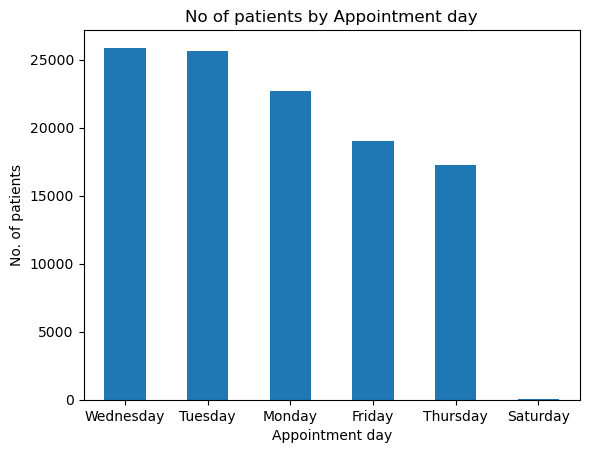

In [63]:
# plotting value counts above on a bar chart
ax = data['Day'].value_counts().plot(
        kind='bar',
        title = 'No of patients by Appointment day',
        rot=0)
ax.set_xlabel('Appointment day')
ax.set_ylabel('No. of patients');

In [64]:
# creating a pivot table
dow = data.groupby(['Day','Noshow'],as_index=False).size()
dow_pivot = pd.pivot(dow, index='Day',columns='Noshow',values='size')
dow_pivot

Noshow,No,Yes
Day,,
Friday,14982,4037
Monday,18024,4690
Saturday,30,9
Thursday,13909,3338
Tuesday,20488,5152
Wednesday,20774,5093


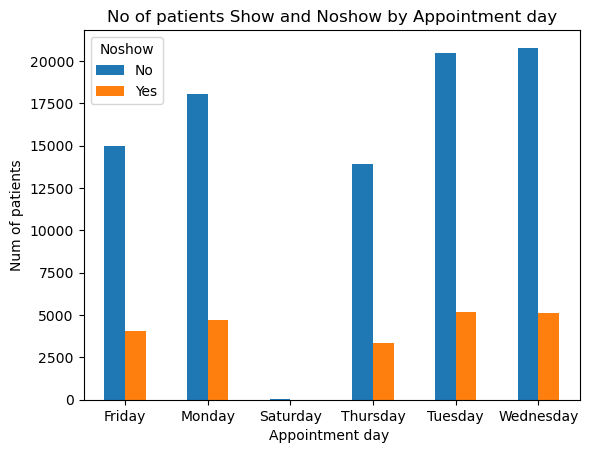

In [65]:
# Chart for grouped pivot Table
ax = dow_pivot.plot(
        kind='bar',
        title='No of patients Show and Noshow by Appointment day',
        rot=0)
ax.set_xlabel('Appointment day ')
ax.set_ylabel('Num of patients');

In [66]:
#number of patients who had their appointment on a Monday
mon_count = data.query('Day == "Monday"').count().Day

# number of monday appointments who showed up
mon_show = data.query('Day == "Monday" & Noshow == "No"').count().Day

# calculating probability
mon_show_prob = probability(mon_show,mon_count)
round(mon_show_prob,2)
print("Probability of Show on appointment on Monday:",round(mon_show_prob,2))

Probability of Show on appointment on Monday: 0.79


#### Probability of Show on appointment on Monday: 79 %

In [67]:
# number of patients who had their appointments on a Tuesday
tue_count = data.query('Day == "Tuesday"').count().Day

# number of Tuesday appointments who showed up
tue_show = data.query('Day == "Tuesday" & Noshow == "No"').count().Day

# calculating probability
tue_show_prob = probability(tue_show,tue_count)
round(tue_show_prob,2)
print("Probability of Show on appointment on Tuesday:",round(tue_show_prob,2))

Probability of Show on appointment on Tuesday: 0.8


#### Probability of Show on appointment on Tuesday: 80 %

In [68]:
# number of patients who had their appointments on a Wednesday
wed_count = data.query('Day == "Wednesday"').count().Day

# number of Wednesday appointments who showed
wed_show = data.query('Day == "Wednesday" & Noshow == "No"').count().Day

# calculating probability
wed_show_prob = probability(wed_show,wed_count)
round(wed_show_prob,2)
print("Probability of Show on appointment on Wednesday:",round(wed_show_prob,2))

Probability of Show on appointment on Wednesday: 0.8


#### Probability of Show on appointment on Wednesday: 80 %


In [69]:
# number of patients who had their appointments on a Thursday
thu_count = data.query('Day == "Thursday"').count().Day

# number of Thursday appointments who showed
thu_show = data.query('Day == "Thursday" & Noshow == "No"').count().Day

# calculating probability
thu_show_prob = probability(thu_show,thu_count)
round(thu_show_prob,2)
print("Probability of Show on appointment on Thursday:",round(thu_show_prob,2))

Probability of Show on appointment on Thursday: 0.81


#### Probability of Show on appointment on Thursday: 81 %


In [70]:
# number of patients who had their appointments on a Friday
fri_count = data.query('Day == "Friday"').count().Day

# number of Friday appointments who showed up
fri_show = data.query('Day == "Friday" & Noshow == "No"').count().Day

# calculating probability
fri_show_prob = probability(fri_show,fri_count)
round(fri_show_prob,2)
print("Probability of Show on appointment on Friday:",round(fri_show_prob,2))

Probability of Show on appointment on Friday: 0.79


#### Probability of Show on appointment on Friday: 79 %


In [71]:
# number of patients who had their appointments on a Saturday
sat_count = data.query('Day == "Saturday"').count().Day

# number of Saturday appointments who showed
sat_show = data.query('Day == "Saturday" & Noshow == "No"').count().Day

# calculating probability
sat_show_prob = probability(sat_show,sat_count)
round(sat_show_prob,2)
print("Probability of Show on appointment on Saturday:",round(sat_show_prob,2))

Probability of Show on appointment on Saturday: 0.77


#### Probability of Show on appointment on Saturday: 77 %

### Distribution and Probility between Age of Patients

In [72]:
# Probabilities for Age
data['Age'].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

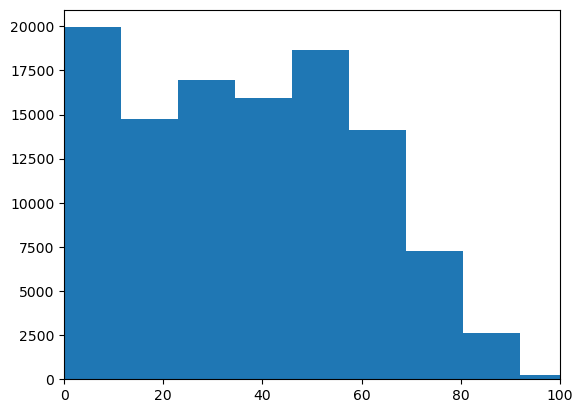

In [73]:
# plotting distribution of ages
bins = np.arange(0,data['Age'].max()+10,10)
plt.hist(data=data,x='Age',bins=10)
plt.xlim((0,100));

In [74]:
# breaking ages down into categories
conditions = [(data['Age'] <= 12),
             (data['Age'] > 12)&(data['Age'] <= 18),
             (data['Age'] > 18)&(data['Age'] <= 60),
             (data['Age'] > 60)]
values = ['child','teenager','adult','elderly']
data['AgeCategory'] = np.select(conditions,values)

In [75]:
# checking distribution of age breakdown
data['AgeCategory'].value_counts()

adult       61898
child       21036
elderly     19762
teenager     7830
Name: AgeCategory, dtype: int64

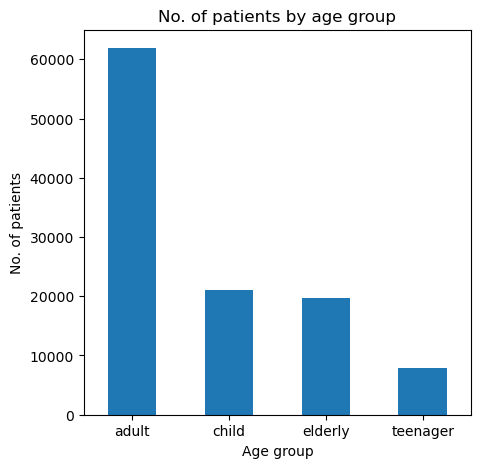

In [76]:
# plotting value counts above in a bar chart
ax = data['AgeCategory'].value_counts().plot(
        kind='bar',
        title = 'No. of patients by age group',
        figsize=(5,5),
        rot=0)
ax.set_xlabel('Age group')
ax.set_ylabel('No. of patients');

In [77]:
# creating a pivot table
age_cat = data.groupby(['AgeCategory','Noshow'],as_index=False).size()
ac_pivot = pd.pivot(age_cat, index='AgeCategory',columns='Noshow',values='size')
ac_pivot

Noshow,No,Yes
AgeCategory,,
adult,48932,12966
child,16729,4307
elderly,16756,3006
teenager,5790,2040


In [78]:
# number of children
child_count = data.query('AgeCategory == "child"').count().AgeCategory

#number of children who showed
child_show = data.query('AgeCategory == "child" & Noshow == "No"').count().AgeCategory

# calculating probability
child_show_prob = probability(child_show,child_count)
round(child_show_prob,2)
print('Probability of Children Show up:',round(child_show_prob,2))

Probability of Children Show up: 0.8


#### Probability of Children Show up: 80 %

In [79]:
# number of Adult patients
adult_count = data.query('AgeCategory == "adult"').count().AgeCategory

# number of elderly patients who showed up
adult_show = data.query('AgeCategory == "adult" & Noshow == "No"').count().AgeCategory

# calculating probability
adult_show_prob = probability(adult_show,adult_count)
round(adult_show_prob,2)
print('Probability of Adult Show up:',round(adult_show_prob,2))

Probability of Adult Show up: 0.79


#### Probability of Adult Show up: 79 %

In [80]:
# number of elderly patients
elderly_count = data.query('AgeCategory == "elderly"').count().AgeCategory

# number of elderly patients who showed up
elderly_show = data.query('AgeCategory == "elderly" & Noshow == "No"').count().AgeCategory

# calculating probability
elderly_show_prob = probability(elderly_show,elderly_count)
round(elderly_show_prob,2)
print('Probability of Elderly Show up:',round(elderly_show_prob,2))

Probability of Elderly Show up: 0.85


#### Probability of Elderly Show up: 85 %

## Conclusion:
 ### Probality of Patients Show is higher than Patients NoShow for their appointments in all conditions.